In [1]:
import matplotlib.pyplot as plt
import missingno as mn
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


/home/balde/Downloads/AUR/y/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='song_popularity', ylabel='count'>

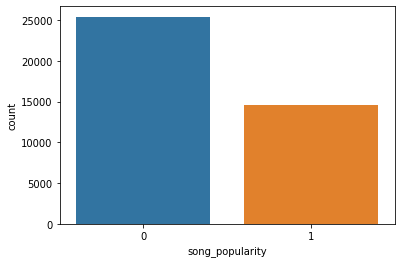

In [3]:
sns.countplot(df.song_popularity)

<AxesSubplot:>

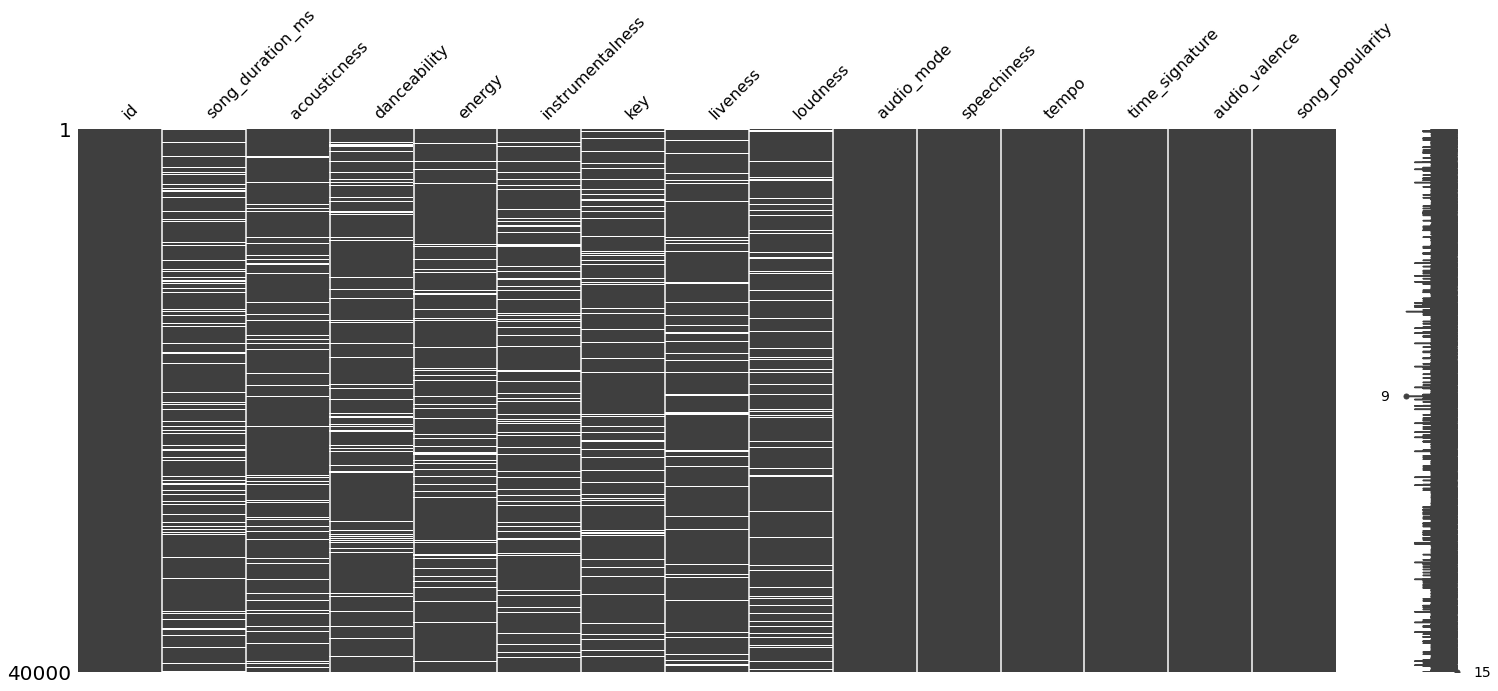

In [4]:
mn.matrix(df)

In [5]:
df.key.value_counts()

0.0     5175
6.0     4949
10.0    4302
2.0     4080
8.0     3028
5.0     2985
9.0     2881
7.0     2690
4.0     2239
1.0     2143
3.0     1346
11.0     117
Name: key, dtype: int64

<AxesSubplot:>

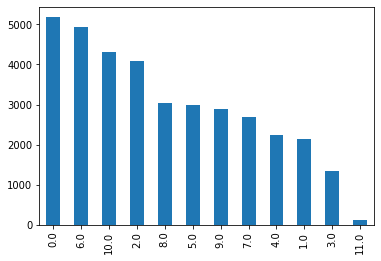

In [6]:
df.key.value_counts().plot(kind="bar")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,40000.0,19999.500000,11547.149720,0.000000,9999.750000,19999.500000,29999.250000,39999.000000
song_duration_ms,35899.0,193165.847572,45822.127679,25658.000000,166254.500000,186660.000000,215116.000000,491671.000000
acousticness,36008.0,0.276404,0.297928,-0.013551,0.039618,0.140532,0.482499,1.065284
danceability,35974.0,0.570951,0.190010,0.043961,0.424760,0.608234,0.718464,0.957131
energy,36025.0,0.683932,0.212662,-0.001682,0.539276,0.704453,0.870503,1.039741
instrumentalness,36015.0,0.036527,0.150024,-0.004398,0.000941,0.001974,0.003225,1.075415
key,35935.0,5.042605,3.372728,0.000000,2.000000,5.000000,8.000000,11.000000
liveness,35914.0,0.198514,0.151670,0.027843,0.111796,0.135945,0.212842,1.065298
loudness,36043.0,-7.407596,3.877198,-32.117911,-9.578139,-6.345413,-4.620711,-0.877346
audio_mode,40000.0,0.321150,0.466924,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop(["id", "song_popularity"], axis=1)
y = df.song_popularity

In [11]:
from sklearn.pipeline import Pipeline

In [12]:
X_col = X.columns.to_list()

In [13]:
pipe = Pipeline([("impute", SimpleImputer()), ("scale", StandardScaler())])

In [14]:
X = pipe.fit_transform(X)

In [18]:
X_df = pd.DataFrame(columns=X_col, data=X)
X_df.isna().sum()

song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

In [21]:
X_train.shape, y_train.shape

((32000, 13), (32000,))

In [23]:
X_test.shape, y_test.shape

((8000, 13), (8000,))

In [25]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = lgr.predict(X_test)

y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
accuracy_score(y_test, y_pred)

0.636

In [30]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      5089
           1       0.47      0.00      0.00      2911

    accuracy                           0.64      8000
   macro avg       0.55      0.50      0.39      8000
weighted avg       0.57      0.64      0.50      8000



In [34]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [40]:
hgb = HistGradientBoostingClassifier(learning_rate=0.01,max_iter=500)
hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.01, max_iter=500)

In [41]:
pred_h = hgb.predict(X_test)

In [42]:
accuracy_score(y_test,pred_h)

0.6375

In [43]:
print(classification_report(y_test, pred_h))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      5089
           1       0.58      0.01      0.03      2911

    accuracy                           0.64      8000
   macro avg       0.61      0.50      0.40      8000
weighted avg       0.62      0.64      0.50      8000

